In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

In [3]:
df=pd.read_csv('Plant_1_Generation_data.csv')
df.describe()
df2=pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
print(df.isnull().sum()) #so no missing values in data generation for plant-1
print(df2.isnull().sum())

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [5]:
#converting data frame with date/time to date time format
df['Date'] = pd.to_datetime(df['DATE_TIME']).dt.date
df['Tim'] = pd.to_datetime(df['DATE_TIME']).dt.hour

In [6]:
df['SOURCE_KEY'].value_counts(normalize=True)
#showing distribution of data for each inverter within a power plant

bvBOhCH3iADSZry    0.045872
1BY6WEcLGh8j5v7    0.045858
7JYdWkrLSPkdwr4    0.045552
VHMLBKoKgIrUVDU    0.045552
ZnxXDlPa8U1GXgE    0.045509
ih0vzX44oOqAx2f    0.045509
wCURE6d3bPkepu2    0.045451
z9Y9gH1T5YWrNuG    0.045451
iCRJl6heRkivqQ3    0.045436
uHbuxQJl8lW7ozc    0.045436
pkci93gMrogZuBj    0.045436
McdE0feGgRqW7Ca    0.045422
zVJPv84UY57bAof    0.045422
rGa61gmuvPhdLxV    0.045422
sjndEbLyjtCKgGv    0.045422
ZoEaEvLYb1n2sOq    0.045407
1IF53ai7Xc0U56Y    0.045349
adLQvlD726eNBSB    0.045349
zBIq5rxdHJRwDNY    0.045349
WRmjgnKYAwPKWDb    0.045334
3PZuoBAID5Wc2HD    0.045334
YxYtjZvoooNbGkE    0.045131
Name: SOURCE_KEY, dtype: float64

In [7]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'Date', 'Tim'],
      dtype='object')

In [8]:
#before making predictions lets see which inverter is performing best and which one is the worst
new_df= df.drop_duplicates(['SOURCE_KEY', 'Date'], keep='last')
print(new_df)
m=[]
s=[]
sort_yield=dict()
for inverter in new_df['SOURCE_KEY'].unique():
#     print(inverter)
    m.append(new_df[new_df['SOURCE_KEY']==inverter]['DAILY_YIELD'].mean())
    s.append(inverter)
fin=pd.DataFrame(list(zip(s,m)),columns=['Inverter', 'Avg daily generation'])
print(fin)
fin.sort_values(['Avg daily generation'],ascending=False,ignore_index=True,)


              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
1932   15-05-2020 23:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1933   15-05-2020 23:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
1934   15-05-2020 23:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
1935   15-05-2020 23:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
1936   15-05-2020 23:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD        Date  Tim  
1932      5754.000    6265313.0  2020-05-15   23  
1933     

,Inverter,Avg daily generation
0,1BY6WEcLGh8j5v7,6420.558824
1,VHMLBKoKgIrUVDU,6248.588235
2,ZnxXDlPa8U1GXgE,6214.617647
3,7JYdWkrLSPkdwr4,6100.882353
4,3PZuoBAID5Wc2HD,6052.588235
5,ih0vzX44oOqAx2f,6019.705882
6,iCRJl6heRkivqQ3,5988.441176
7,pkci93gMrogZuBj,5931.617647
8,YxYtjZvoooNbGkE,5919.764706
9,zVJPv84UY57bAof,5915.040441


In [9]:
q=df['SOURCE_KEY'].unique()
new_d={}

for inv in s:
    new_d.setdefault(inv,dict())
    d1=[]
    d2=[]
#     new_d={inv:{}}
    for hour in range (0,23):
        temp1=df[(df['SOURCE_KEY']==inv)&(df['Tim']==hour)]['DC_POWER'].mean()
        d1.append(temp1)
        temp2=df[(df['SOURCE_KEY']==inv)&(df['Tim']==hour)]['AC_POWER'].mean()
        d2.append(temp2)
#         new_d={inv:{'DC mean '+str(hour):temp1, 'AC mean '+str(hour):temp2}}
        new_d[inv].setdefault('DC_mean '+ str(hour),temp1)
        new_d[inv].setdefault('AC_mean '+ str(hour),temp2)


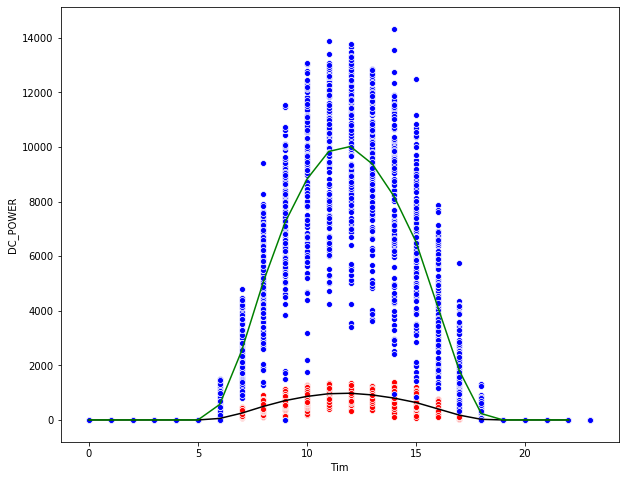

In [10]:
plt.figure(figsize=(10,8))
plot_df=pd.DataFrame({'hour':[a for a in range(0,23)],'DC_mean':d1,'AC_mean':d2}) #for inverter zVJPv84UY57bAof
plot_df.iloc[:,[0,2]]
sb.lineplot(data=plot_df.iloc[:,[0,2]], x='hour', y='AC_mean', color='black')
sb.lineplot(data=plot_df.iloc[:,[0,1]], x='hour', y='DC_mean', color='green')
plt.ylabel('Avg_power')
# we can see a major problem here the average DC power (at the inverter input is sinificantly higher than output AC power 
# which might be due to problem with the inverter our damaged sensors.)
# now lets just plot all Ac and DC values obtained during monitoring period for the same inverter over 24 hour period
p_df=df[df['SOURCE_KEY']=='zVJPv84UY57bAof']
p_df=p_df.loc[:,['Tim','AC_POWER', 'DC_POWER']]
# p_df.iloc[:,0:2]
sb.scatterplot(data=p_df.iloc[:,0:2],x='Tim',y='AC_POWER',color='red')
sb.scatterplot(data=p_df.iloc[:,[0,2]],x='Tim',y='DC_POWER',color='blue')


In [15]:
df.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Date,Tim
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,0


In [22]:
df2['Date'] = pd.to_datetime(df2['DATE_TIME']).dt.date
df2['Tim'] = pd.to_datetime(df2['DATE_TIME']).dt.hour
df2.head(10
        )

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Date,Tim
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,1
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0,2020-05-15,1
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0,2020-05-15,1
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0,2020-05-15,1
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0,2020-05-15,2
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0,2020-05-15,2


In [23]:
result = pd.merge(df, df2, how="inner", on=['Date','Tim'])

In [24]:
result.head(10)

,DATE_TIME_x,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Date,Tim,DATE_TIME_y,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,0,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
5,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
6,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
7,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,0,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
8,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
9,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,0,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0


In [37]:
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future


,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01
